In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('data/automobileEDA.csv')
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


### dự đoán price dựa vào horsepower, curb-weight, engine-size, highway-mpg

In [4]:
# --> sử dụng multiple linear regression

In [5]:
#import thư viện
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [6]:
# chuẩn bị dữ liệu X, y
X = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y = df['price']

In [7]:
# chia dữ liệu thành train và test theo tỉ lệ 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [8]:
X_train.shape, X_test.shape

((160, 4), (41, 4))

In [9]:
# khởi tạo model
model = LinearRegression()

In [10]:
# huấn luyện model (train model)
model.fit(X_train, y_train)

LinearRegression()

In [11]:
# kiểm tra model dựa trên bộ train
yhat_train = model.predict(X_train)

In [12]:
y_train[:5]

189    12290.0
154     7898.0
72     16503.0
179     7975.0
17      5151.0
Name: price, dtype: float64

In [13]:
yhat_train[:5]

array([11022.47327768,  8332.03732553, 19207.22405555,  9243.0075922 ,
         410.98562791])

In [14]:
# kiểm tra trên bộ test
yhat_test = model.predict(X_test)

In [15]:
y_test[:5]

47      5195.0
28     12964.0
131    15510.0
6      17710.0
182     8495.0
Name: price, dtype: float64

In [16]:
yhat_test[:5]

array([ 5345.58260085, 18675.3991495 , 13931.66353344, 15542.88617166,
        9560.06665417])

In [17]:
# xác định hệ số a và b 
a = model.intercept_
b = model.coef_

In [18]:
a

-15175.326099280337

In [19]:
b

array([46.64399781,  4.80392518, 83.94272632, 20.35194071])

In [20]:
print('Phương trình dự đoán price theo horsepower, curb-weight, engine-size, highway-mpg có dạng:')
print('price =', a, '+', b[0], 'x horsepower +', b[1], 'x curb-weight +', b[2], 'x engine-size +', 
      b[3], 'x highway-mpg')

Phương trình dự đoán price theo horsepower, curb-weight, engine-size, highway-mpg có dạng:
price = -15175.326099280337 + 46.64399780576051 x horsepower + 4.803925181298043 x curb-weight + 83.9427263164102 x engine-size + 20.35194070634716 x highway-mpg


In [21]:
# đo lường các chỉ số để đánh giá model: R-squared và MSE, MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [22]:
# tính R-squared
print('R-squared train data:', round(model.score(X_train, y_train) * 100, 2), '%')
print('R-squared test data:', round(model.score(X_test, y_test) * 100, 2), '%')

R-squared train data: 83.58 %
R-squared test data: 67.65 %


In [23]:
# tính MSE và MAE
print('MSE train data:', mean_squared_error(y_train, yhat_train))
print('MSE test data:', mean_squared_error(y_test, yhat_test))

print('MAE train data:', mean_absolute_error(y_train, yhat_train))
print('MAE test data:', mean_absolute_error(y_test, yhat_test))

MSE train data: 10794081.801695555
MSE test data: 16685213.705353638
MAE train data: 2321.5261643789713
MAE test data: 2940.8604771126306


In [24]:
# sử dụng công cụ trực quan để đánh giá model
# vẽ biểu đồ phân tán (scatter) giữa y_test và yhat_test
# vẽ thêm 1 line đóng vai trò tham chiếu đi từ (0, 0) đến (50000, 50000)

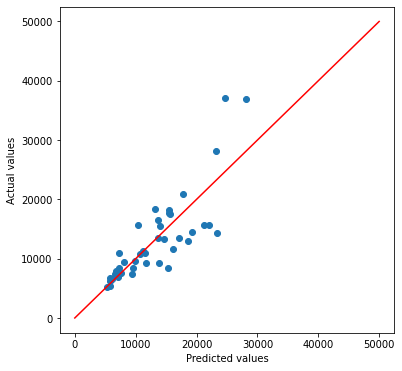

In [25]:
plt.figure(figsize = (6,6))
plt.scatter(yhat_test, y_test)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.plot([0, 50000], [0, 50000], 'r-')
plt.show()

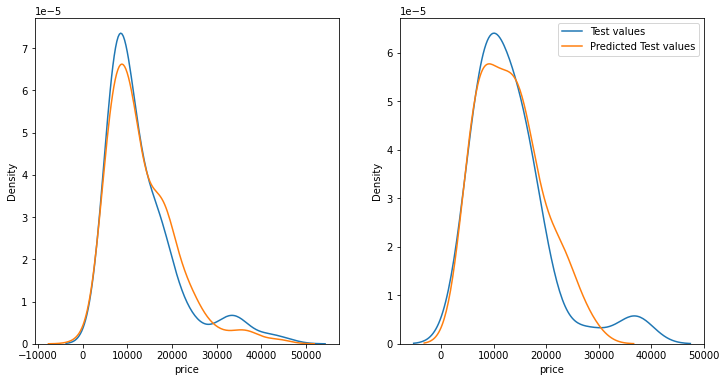

In [31]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
sns.distplot(y_train, label = 'Train values', hist=False)
sns.distplot(yhat_train, label = 'Predicted Train values', hist=False)

plt.subplot(1,2,2)
sns.distplot(y_test, label = 'Test values', hist=False)
sns.distplot(yhat_test, label = 'Predicted Test values', hist=False)
plt.legend()
plt.show()

In [32]:
# lưu lại bộ train và bộ test
df_train = pd.DataFrame(X_train, columns=X_train.columns)
df_train['price'] = y_train
df_test = pd.DataFrame(X_test, columns=X_test.columns)
df_test['price'] = y_test

In [33]:
df_train.to_csv('data/autoMobile_train.csv', index=False)
df_test.to_csv('data/autoMobile_test.csv', index=False)